In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime

from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [2]:
sns.set()
mpl.rcParams['figure.figsize'] = (16,5)

In [3]:
data = pd.read_csv('data_ER_Reg_and_KPIs_2.csv')

# Select measurements from registration and target variables

In [4]:
data_reduced = data[['age', 'disfuncorg', 'hypotensie', 'hypoxie',
       'infectionsuspected', 'oligurie', 'sirscritleucos',
       'sirscritheartrate', 'sirscrittachypnea', 'sirscrittemperature',
       'duration', 'number_of_steps']]

## Reduced Dataset

In [5]:
data_reduced.head()

,age,disfuncorg,hypotensie,hypoxie,infectionsuspected,oligurie,sirscritleucos,sirscritheartrate,sirscrittachypnea,sirscrittemperature,duration,number_of_steps
0,85,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,16139.316406,22
1,45,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,7615.600098,12
2,55,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,8070.516602,14
3,70,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,26264.683594,13
4,75,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,21.016666,8


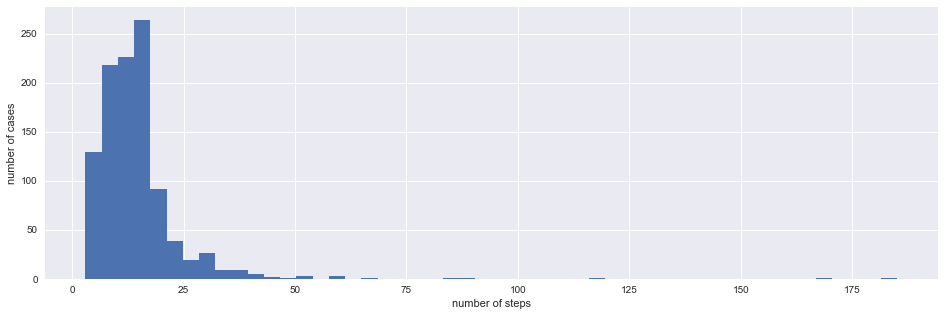

In [6]:
data.number_of_steps.hist(bins=50)
plt.xlabel("number of steps")
plt.ylabel("number of cases")
plt.show()

## Split features and targets

In [7]:
target = pd.DataFrame(data_reduced.number_of_steps)
df_input_var = data_reduced.drop(['duration', 'number_of_steps'], axis=1)

## Split data into training and test set

In [8]:
X = np.array(df_input_var.values)
X = X[:,1:] # exclude age
y = np.ravel(np.log(np.array(target.values)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit a Random Forest Regressor to the training data

In [9]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=6, random_state=0)
_ = regr.fit(X_train, y_train)

In [10]:
b = df_input_var.columns[1:]
all_m = []
for k,v in zip(regr.feature_importances_, b):
    all_m.append((k,v))

m1 = [k for k,v in all_m]
m2 = [v for k,v in all_m]


# Plot importance of features

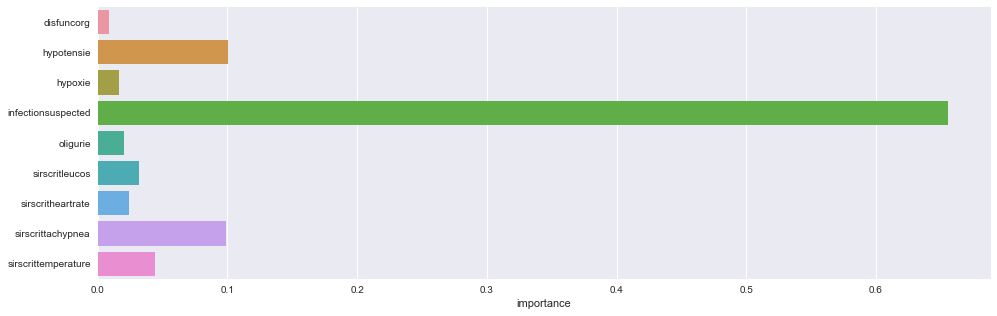

In [15]:
sns.barplot(x=m1, y=m2)
plt.xlabel("importance")
plt.show()

## Predict the values

In [20]:
yhat_test = regr.predict(X_test)

# Mean Squared Error on test data set

In [24]:
print("Mean Squared Error:  {:.2}".format(mean_squared_error(y_test, yhat_test)))

Mean Squared Error:  0.26


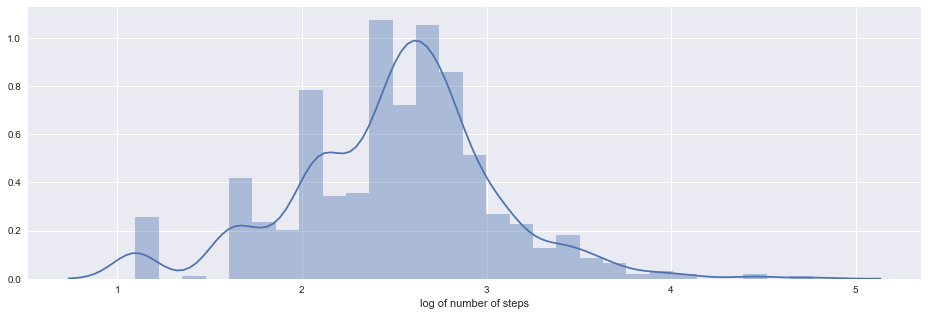

In [43]:
sns.distplot(y_train)
plt.xlabel("log of number of steps")
plt.show()